# Support Vector Machine und Confusion Matrix 

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Support-Vector-Machine-und-Confusion-Matrix" data-toc-modified-id="Support-Vector-Machine-und-Confusion-Matrix-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Support Vector Machine und Confusion Matrix</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#SVM-mit-dem-ursprünglichen-Datensatz-" data-toc-modified-id="SVM-mit-dem-ursprünglichen-Datensatz--1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>SVM mit dem ursprünglichen Datensatz <a name="paragraph1"></a></a></span><ul class="toc-item"><li><span><a href="#Genre1-als-Labels-und-mit-Text-als-Features--" data-toc-modified-id="Genre1-als-Labels-und-mit-Text-als-Features---1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>Genre1 als Labels und mit Text als Features  <a name="subparagraph1"></a></a></span></li><li><span><a href="#Genre2-als-Labels-und-mit-Text-als-Features-" data-toc-modified-id="Genre2-als-Labels-und-mit-Text-als-Features--1.0.1.2"><span class="toc-item-num">1.0.1.2&nbsp;&nbsp;</span>Genre2 als Labels und mit Text als Features <a name="subparagraph2"></a></a></span></li><li><span><a href="#Genre1-als-Labels-und-mit-POS-als-Feature-" data-toc-modified-id="Genre1-als-Labels-und-mit-POS-als-Feature--1.0.1.3"><span class="toc-item-num">1.0.1.3&nbsp;&nbsp;</span>Genre1 als Labels und mit POS als Feature <a name="subparagraph3"></a></a></span></li><li><span><a href="#Genre2-als-Labels-mit-und-POS-als-Feature-" data-toc-modified-id="Genre2-als-Labels-mit-und-POS-als-Feature--1.0.1.4"><span class="toc-item-num">1.0.1.4&nbsp;&nbsp;</span>Genre2 als Labels mit und POS als Feature <a name="subparagraph4"></a></a></span></li><li><span><a href="#Genre1-als-Labels-und-mit-Stemming-als-Features-" data-toc-modified-id="Genre1-als-Labels-und-mit-Stemming-als-Features--1.0.1.5"><span class="toc-item-num">1.0.1.5&nbsp;&nbsp;</span>Genre1 als Labels und mit Stemming als Features <a name="subparagraph5"></a></a></span></li><li><span><a href="#Genre2-als-Labels-und-mit-Stemming-als-Features-" data-toc-modified-id="Genre2-als-Labels-und-mit-Stemming-als-Features--1.0.1.6"><span class="toc-item-num">1.0.1.6&nbsp;&nbsp;</span>Genre2 als Labels und mit Stemming als Features <a name="subparagraph6"></a></a></span></li></ul></li><li><span><a href="#SVM-mit-neuem-Datensatz-und-Date-als-Labels-und-mit-Text-als-Features-" data-toc-modified-id="SVM-mit-neuem-Datensatz-und-Date-als-Labels-und-mit-Text-als-Features--1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>SVM mit neuem Datensatz und Date als Labels und mit Text als Features <a name="paragraph2"></a></a></span><ul class="toc-item"><li><span><a href="#Mit-Date-als-Labels-und-mit-POS-als-Features-" data-toc-modified-id="Mit-Date-als-Labels-und-mit-POS-als-Features--1.0.2.1"><span class="toc-item-num">1.0.2.1&nbsp;&nbsp;</span>Mit Date als Labels und mit POS als Features <a name="subparagraph1"></a></a></span></li><li><span><a href="#Mit-Date-als-Labels-und-mit-Stemming-als-Features-" data-toc-modified-id="Mit-Date-als-Labels-und-mit-Stemming-als-Features--1.0.2.2"><span class="toc-item-num">1.0.2.2&nbsp;&nbsp;</span>Mit Date als Labels und mit Stemming als Features <a name="subparagraph2"></a></a></span></li></ul></li><li><span><a href="#SVM-mit-den-überdurchschnittlich-langen-Liedern-und-Genre1als-Labels-und-mit-Text-als-Features-" data-toc-modified-id="SVM-mit-den-überdurchschnittlich-langen-Liedern-und-Genre1als-Labels-und-mit-Text-als-Features--1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>SVM mit den überdurchschnittlich langen Liedern und Genre1als Labels und mit Text als Features <a name="paragraph3"></a></a></span><ul class="toc-item"><li><span><a href="#Mit-Genre1-als-Labels-und-mit-POS-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-POS-als-Features--1.0.3.1"><span class="toc-item-num">1.0.3.1&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit POS als Features <a name="subparagraph1"></a></a></span></li><li><span><a href="#Mit-Genre1-als-Labels-und-mit-Stemming-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-Stemming-als-Features--1.0.3.2"><span class="toc-item-num">1.0.3.2&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit Stemming als Features <a name="subparagraph2"></a></a></span></li><li><span><a href="#Mit-Genre2-als-Labels-und-mit-Text-als-Features-" data-toc-modified-id="Mit-Genre2-als-Labels-und-mit-Text-als-Features--1.0.3.3"><span class="toc-item-num">1.0.3.3&nbsp;&nbsp;</span>Mit Genre2 als Labels und mit Text als Features <a name="subparagraph3"></a></a></span></li><li><span><a href="#Mit-Genre2-als-Labels-und-mit-POS-als-Features-" data-toc-modified-id="Mit-Genre2-als-Labels-und-mit-POS-als-Features--1.0.3.4"><span class="toc-item-num">1.0.3.4&nbsp;&nbsp;</span>Mit Genre2 als Labels und mit POS als Features <a name="subparagraph4"></a></a></span></li><li><span><a href="#Mit-Genre2-als-Labels-und-Stemming-als-Features-" data-toc-modified-id="Mit-Genre2-als-Labels-und-Stemming-als-Features--1.0.3.5"><span class="toc-item-num">1.0.3.5&nbsp;&nbsp;</span>Mit Genre2 als Labels und Stemming als Features <a name="subparagraph5"></a></a></span></li></ul></li><li><span><a href="#SVM-mit-allen-Liedtexten-eines-Künstlers-und-mit-Genre1-als-Labels-und-mit-Text-als-Features-" data-toc-modified-id="SVM-mit-allen-Liedtexten-eines-Künstlers-und-mit-Genre1-als-Labels-und-mit-Text-als-Features--1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>SVM mit allen Liedtexten eines Künstlers und mit Genre1 als Labels und mit Text als Features <a name="paragraph4"></a></a></span><ul class="toc-item"><li><span><a href="#Mit-Genre1-als-Labels-und-mit-POS-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-POS-als-Features--1.0.4.1"><span class="toc-item-num">1.0.4.1&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit POS als Features <a name="subparagraph1"></a></a></span></li><li><span><a href="#Mit-Genre1-als-Labels-und-mit-Stemming-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-Stemming-als-Features--1.0.4.2"><span class="toc-item-num">1.0.4.2&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit Stemming als Features <a name="subparagraph2"></a></a></span></li></ul></li><li><span><a href="#SVM-mit-Features-anreichern,-mit-Genre1-als-Labels-und-mit-Text-und-POS-als-Features-" data-toc-modified-id="SVM-mit-Features-anreichern,-mit-Genre1-als-Labels-und-mit-Text-und-POS-als-Features--1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>SVM mit Features anreichern, mit Genre1 als Labels und mit Text und POS als Features <a name="paragraph5"></a></a></span><ul class="toc-item"><li><span><a href="#Mit-Genre1-als-Labels-und-mit-Text-und-Stemming-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-Text-und-Stemming-als-Features--1.0.5.1"><span class="toc-item-num">1.0.5.1&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit Text und Stemming als Features <a name="subparagraph1"></a></a></span></li><li><span><a href="#Mit-Genre1-als-Labels-und-mit-POS-und-Stemming-als-Features-" data-toc-modified-id="Mit-Genre1-als-Labels-und-mit-POS-und-Stemming-als-Features--1.0.5.2"><span class="toc-item-num">1.0.5.2&nbsp;&nbsp;</span>Mit Genre1 als Labels und mit POS und Stemming als Features <a name="subparagraph2"></a></a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd

In [2]:
corpus = pd.read_csv("../../songs_25.csv")

In [3]:
corpus.head(2)

,Unnamed: 0,Unnamed: 0.1,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,stemmed_text
0,0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,sometim when i 'm mad there 's a part of me t...
1,1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,tri to sneak out without say with my loudest ...


### SVM mit dem ursprünglichen Datensatz <a name="paragraph1"></a>

#### Genre1 als Labels und mit Text als Features  <a name="subparagraph1"></a>

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)



In [5]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.601.


In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])}

grid = GridSearchCV(SVC(gamma='auto'), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5987.


In [11]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.601.


In [61]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.59.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [62]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.592.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [63]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.595.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


In [64]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.599.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


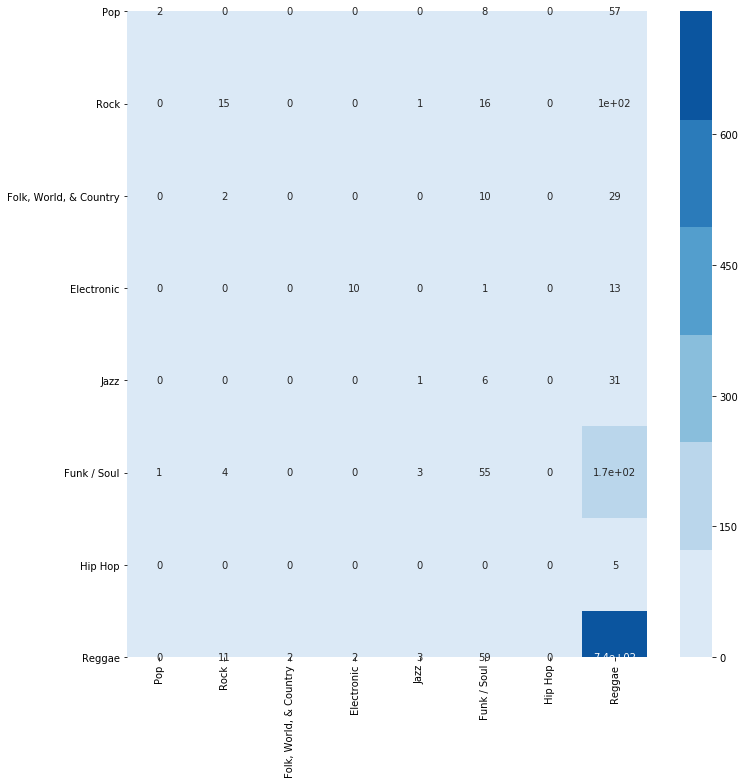

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.67      0.03      0.06        67
                  Rock       0.47      0.11      0.18       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.83      0.42      0.56        24
                  Jazz       0.12      0.03      0.04        38
           Funk / Soul       0.35      0.24      0.28       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.65      0.91      0.75       818

              accuracy                           0.61      1360
             macro avg       0.39      0.22      0.23      1360
          weighted avg       0.55      0.61      0.53      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Genre2 als Labels und mit Text als Features <a name="subparagraph2"></a>

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)



In [68]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.445.

Der F1-score für die Klassifizierung mit SVM ist 0.474.


In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4787.


In [72]:
classify_svm(C=0.5,cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.464.

Der F1-score für die Klassifizierung mit SVM ist 0.486.


In [73]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.461.

Der F1-score für die Klassifizierung mit SVM ist 0.486.


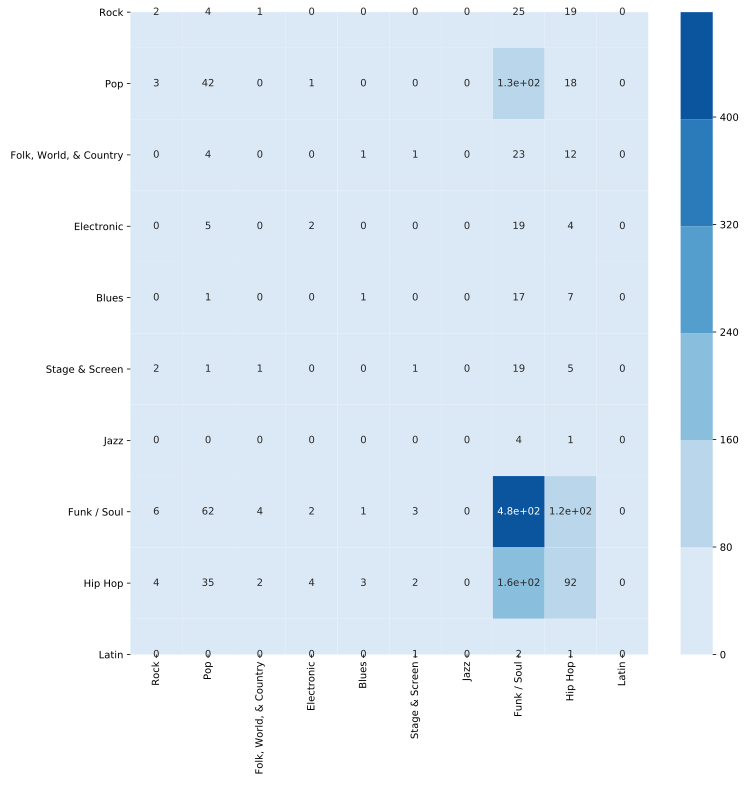

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.12      0.04      0.06        51
                    Pop       0.27      0.22      0.24       190
 Folk, World, & Country       0.00      0.00      0.00        41
             Electronic       0.22      0.07      0.10        30
                  Blues       0.17      0.04      0.06        26
         Stage & Screen       0.12      0.03      0.05        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.55      0.71      0.61       678
                Hip Hop       0.33      0.30      0.31       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.45      1360
              macro avg       0.18      0.14      0.15      1360
           weighted avg       0.40      0.45      0.42      1360



#### Genre1 als Labels und mit POS als Feature <a name="subparagraph3"></a>

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [28]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.563.

Der F1-score für die Klassifizierung mit SVM ist 0.571.


In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5903.


In [87]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.584.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [88]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.58.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [89]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.584.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [90]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.587.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


In [91]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.588.

Der F1-score für die Klassifizierung mit SVM ist 0.593.


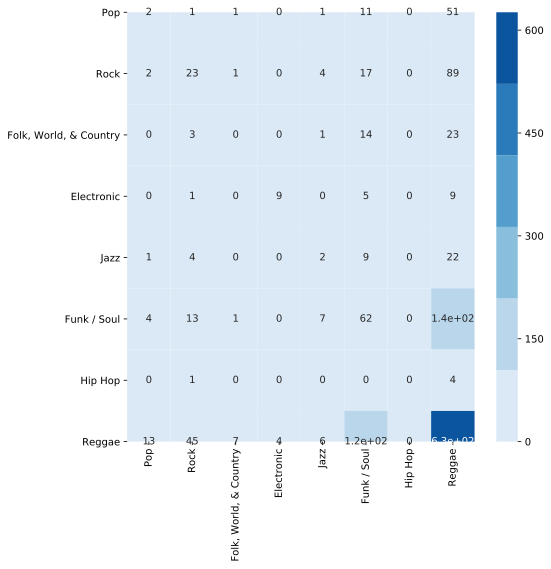

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(8,8))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()
#plt.savefig('SVM_KM/CM_Genre1_POS.png', bbox_inches = "tight")

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.09      0.03      0.04        67
                  Rock       0.25      0.17      0.20       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.69      0.38      0.49        24
                  Jazz       0.10      0.05      0.07        38
           Funk / Soul       0.26      0.27      0.27       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.65      0.77      0.70       818

              accuracy                           0.53      1360
             macro avg       0.26      0.21      0.22      1360
          weighted avg       0.48      0.53      0.50      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Genre2 als Labels mit und POS als Feature <a name="subparagraph4"></a>


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [15]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.433.

Der F1-score für die Klassifizierung mit SVM ist 0.444.


In [98]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.47.


In [99]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.453.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [100]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.453.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [101]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.455.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [102]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.462.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


In [103]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.461.


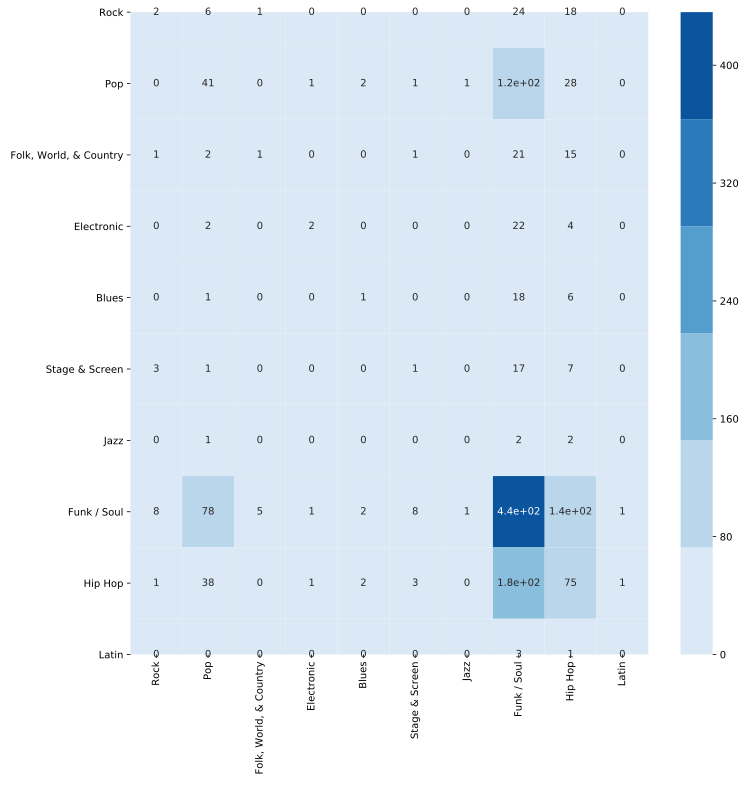

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=3.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.13      0.04      0.06        51
                    Pop       0.24      0.22      0.23       190
 Folk, World, & Country       0.14      0.02      0.04        41
             Electronic       0.40      0.07      0.11        30
                  Blues       0.14      0.04      0.06        26
         Stage & Screen       0.07      0.03      0.05        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.52      0.64      0.57       678
                Hip Hop       0.26      0.25      0.25       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.41      1360
              macro avg       0.19      0.13      0.14      1360
           weighted avg       0.37      0.41      0.38      1360



#### Genre1 als Labels und mit Stemming als Features <a name="subparagraph5" >

In [132]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [133]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.575.

Der F1-score für die Klassifizierung mit SVM ist 0.583.


In [134]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.598.


In [135]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.588.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [114]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.59.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [115]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.591.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [116]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.596.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


In [117]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.597.

Der F1-score für die Klassifizierung mit SVM ist 0.603.


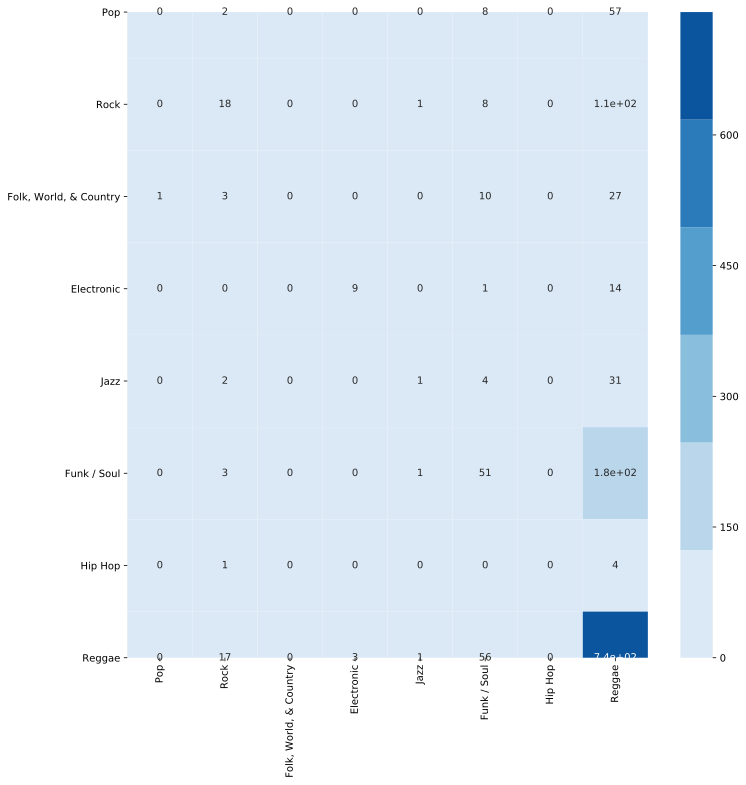

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.00      0.00      0.00        67
                  Rock       0.39      0.13      0.20       136
Folk, World, & Country       0.00      0.00      0.00        41
            Electronic       0.75      0.38      0.50        24
                  Jazz       0.25      0.03      0.05        38
           Funk / Soul       0.37      0.22      0.28       231
               Hip Hop       0.00      0.00      0.00         5
                Reggae       0.64      0.91      0.75       818

              accuracy                           0.60      1360
             macro avg       0.30      0.21      0.22      1360
          weighted avg       0.51      0.60      0.53      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Genre2 als Labels und mit Stemming als Features <a name="subparagraph6"></a>

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

In [121]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.448.

Der F1-score für die Klassifizierung mit SVM ist 0.471.


In [123]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=10, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4855.


In [124]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [125]:
classify_svm(C=0.5, cv=10)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.463.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [126]:
classify_svm(C=0.5, cv=20)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.466.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [127]:
classify_svm(C=0.5, cv=50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.474.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


In [128]:
classify_svm(C=0.5, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 25 members, which is too few. The minimum number of members in any class cannot be less than n_splits=100.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.478.

Der F1-score für die Klassifizierung mit SVM ist 0.485.


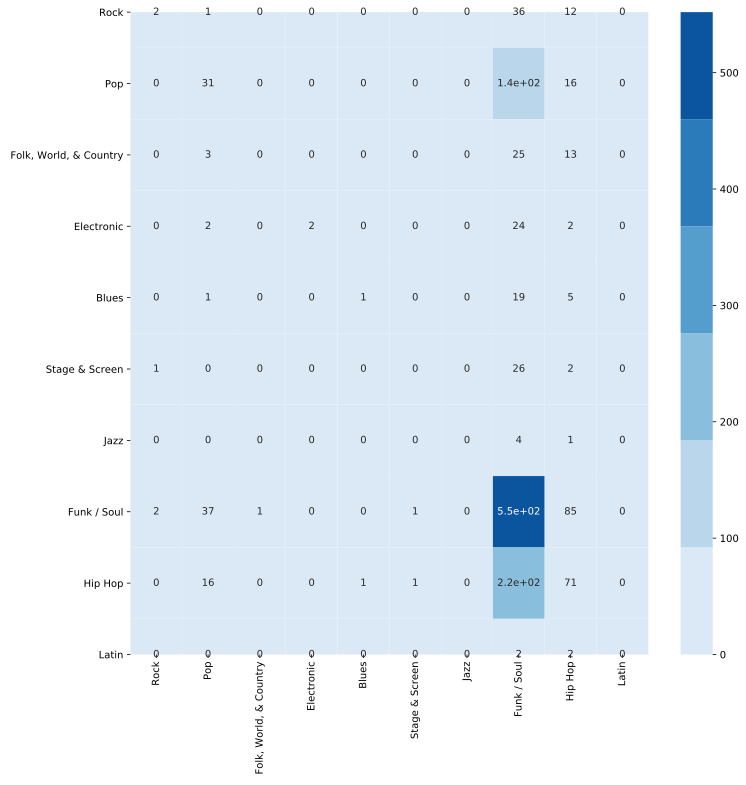

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.40      0.04      0.07        51
                    Pop       0.34      0.16      0.22       190
 Folk, World, & Country       0.00      0.00      0.00        41
             Electronic       1.00      0.07      0.12        30
                  Blues       0.50      0.04      0.07        26
         Stage & Screen       0.00      0.00      0.00        29
                   Jazz       0.00      0.00      0.00         5
            Funk / Soul       0.53      0.81      0.64       678
                Hip Hop       0.34      0.23      0.28       306
                  Latin       0.00      0.00      0.00         4

               accuracy                           0.48      1360
              macro avg       0.31      0.14      0.14      1360
           weighted avg       0.43      0.48      0.42      1360



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM mit neuem Datensatz und Date als Labels und mit Text als Features <a name="paragraph2"></a>

In [5]:
import pandas as pd 

In [6]:
corpus = pd.read_csv("../songs_plus_dates.csv")

In [7]:
corpus.head(2)

,Unnamed: 0,song,date,artist,text,Genre1,Genre2,number_of_tokens,stemmed_text,POS
0,0,"Andante, Andante",1980,ABBA,take it easy with me please touch me gently ...,Pop,Rock,1434,"take it easi with me , pleas touch me gentli ...",easy slow soft light strong strong strong stro...
1,1,As Good As New,1979,ABBA,i'll never know why i had to go why i had to ...,Pop,Rock,1477,I 'll never know whi I had to go whi I had to...,lousy rotten tough enough good new good new ne...


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [13]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.047.


In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0407.


In [11]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.038.

Der F1-score für die Klassifizierung mit SVM ist 0.046.


#### Mit Date als Labels und mit POS als Features <a name="subparagraph1"></a>

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [16]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.027.

Der F1-score für die Klassifizierung mit SVM ist 0.039.


In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0307.


In [18]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.028.

Der F1-score für die Klassifizierung mit SVM ist 0.04.


#### Mit Date als Labels und mit Stemming als Features <a name="subparagraph2"></a>

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

labels = LabelEncoder().fit_transform(corpus["date"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)


In [20]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = LinearSVC(C=C)
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.044.


In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.0404.


In [22]:
classify_svm(C=0.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.037.

Der F1-score für die Klassifizierung mit SVM ist 0.047.


### SVM mit den überdurchschnittlich langen Liedern und Genre1als Labels und mit Text als Features <a name="paragraph3"></a>

In [1]:
import pandas as pd

In [2]:
corpus = pd.read_csv("../../songs_longtexts.csv")

In [3]:
corpus.head(2)

,Unnamed: 0,song,artist,link,text,stemmed_text,POS,POS_tags,Genre1,Genre2,genre1,genre2,number_of_tokens,number_of_types,date,decades
0,0,"Andante, Andante",ABBA,/a/abba/andante+andante_20002708.html,take it easy with me please touch me gently ...,take it easi with me pleas touch me gentli li...,easy slow andante soft light andante strong st...,"['VB', 'PRP', 'JJ', 'IN', 'PRP', '_SP', 'UH', ...",Pop,Rock,europop,swedish pop,260.0,87.0,1980,1980s
1,1,As Good As New,ABBA,/a/abba/as+good+as+new_20003033.html,i'll never know why i had to go why i had to ...,i 'll never know whi i had to go whi i had to...,lousy rotten tough enough good new good new ne...,"['PRP', 'MD', 'RB', 'VB', 'WRB', 'PRP', 'VBD',...",Pop,Rock,europop,swedish pop,312.0,120.0,1979,1970s


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

10 10


In [5]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
classify_svm()

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.573.

Der F1-score für die Klassifizierung mit SVM ist 0.577.


In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5977.


In [7]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.573.

Der F1-score für die Klassifizierung mit SVM ist 0.577.


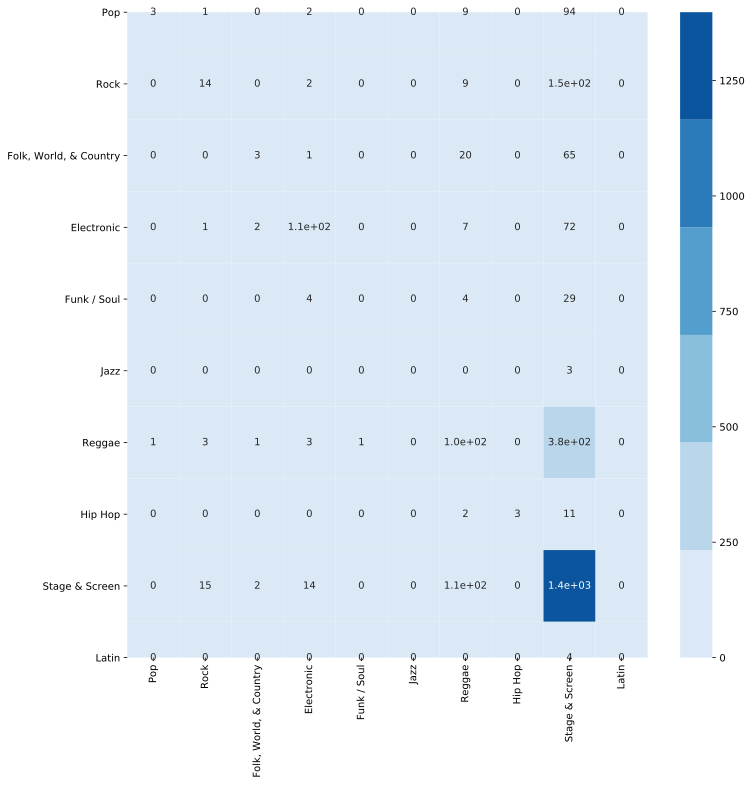

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.75      0.03      0.05       109
                  Rock       0.41      0.08      0.14       173
Folk, World, & Country       0.38      0.03      0.06        89
            Electronic       0.81      0.58      0.68       196
           Funk / Soul       0.00      0.00      0.00        37
                  Jazz       0.00      0.00      0.00         3
                Reggae       0.40      0.21      0.28       497
               Hip Hop       1.00      0.19      0.32        16
        Stage & Screen       0.63      0.91      0.75      1536
                 Latin       0.00      0.00      0.00         4

              accuracy                           0.62      2660
             macro avg       0.44      0.20      0.23      2660
          weighted avg       0.58      0.62      0.55      2660



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre1 als Labels und mit POS als Features <a name="subparagraph1"></a>

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

10 9


In [11]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.5962.


In [13]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.573.

Der F1-score für die Klassifizierung mit SVM ist 0.579.


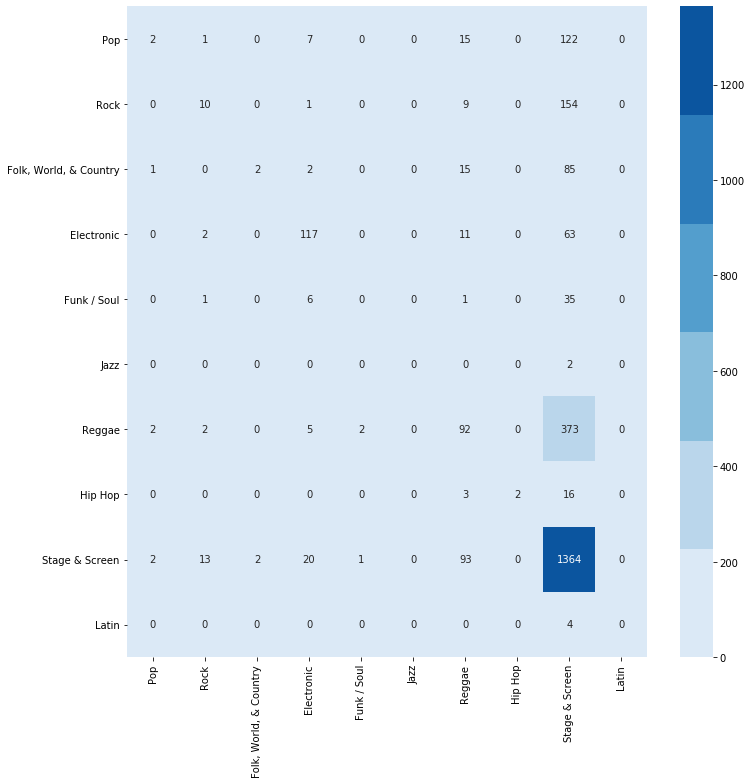

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

#### Mit Genre1 als Labels und mit Stemming als Features <a name="subparagraph2"></a>

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

10 10


In [18]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.6227.


In [20]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.573.

Der F1-score für die Klassifizierung mit SVM ist 0.568.


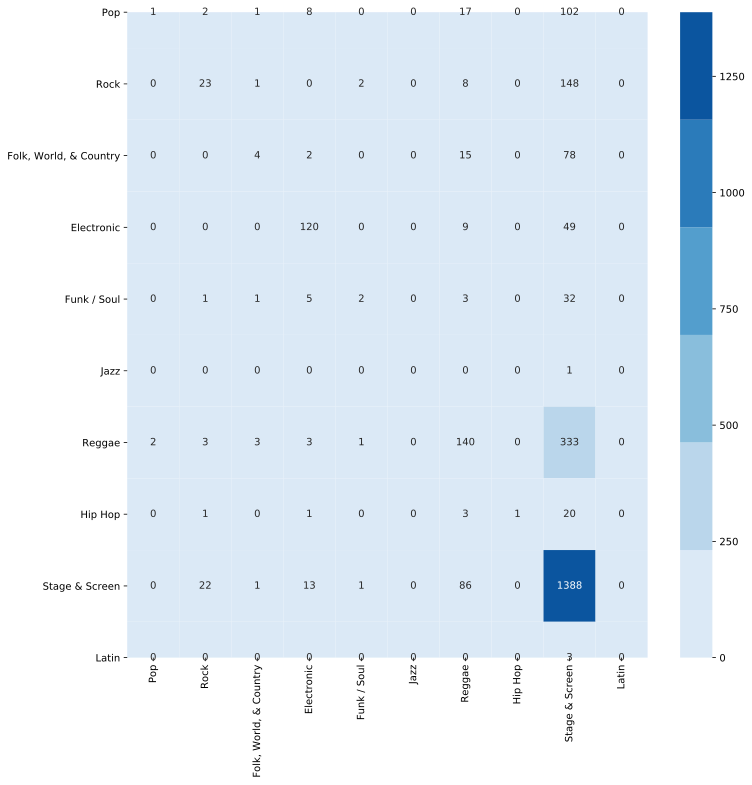

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.33      0.01      0.01       131
                  Rock       0.44      0.13      0.20       182
Folk, World, & Country       0.36      0.04      0.07        99
            Electronic       0.79      0.67      0.73       178
           Funk / Soul       0.33      0.05      0.08        44
                  Jazz       0.00      0.00      0.00         1
                Reggae       0.50      0.29      0.37       485
               Hip Hop       1.00      0.04      0.07        26
        Stage & Screen       0.64      0.92      0.76      1511
                 Latin       0.00      0.00      0.00         3

              accuracy                           0.63      2660
             macro avg       0.44      0.21      0.23      2660
          weighted avg       0.59      0.63      0.56      2660



#### Mit Genre2 als Labels und mit Text als Features <a name="subparagraph3"></a>


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

13 13


In [26]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4517.


In [28]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.455.

Der F1-score für die Klassifizierung mit SVM ist 0.451.


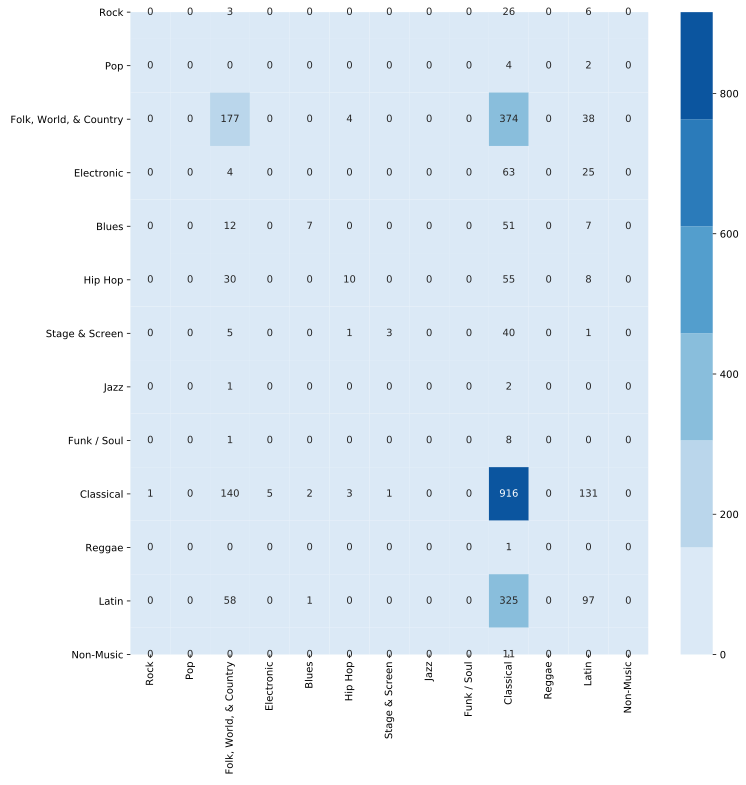

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.00      0.00      0.00        35
                    Pop       0.00      0.00      0.00         6
 Folk, World, & Country       0.41      0.30      0.35       593
             Electronic       0.00      0.00      0.00        92
                  Blues       0.70      0.09      0.16        77
                Hip Hop       0.56      0.10      0.17       103
         Stage & Screen       0.75      0.06      0.11        50
                   Jazz       0.00      0.00      0.00         3
            Funk / Soul       0.00      0.00      0.00         9
              Classical       0.49      0.76      0.60      1199
                 Reggae       0.00      0.00      0.00         1
                  Latin       0.31      0.20      0.24       481
              Non-Music       0.00      0.00      0.00        11

               accuracy                           0.45      2660
              macro avg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre2 als Labels und mit POS als Features <a name="subparagraph4"></a>

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

13 13


In [5]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.434.


In [35]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.455.

Der F1-score für die Klassifizierung mit SVM ist 0.453.


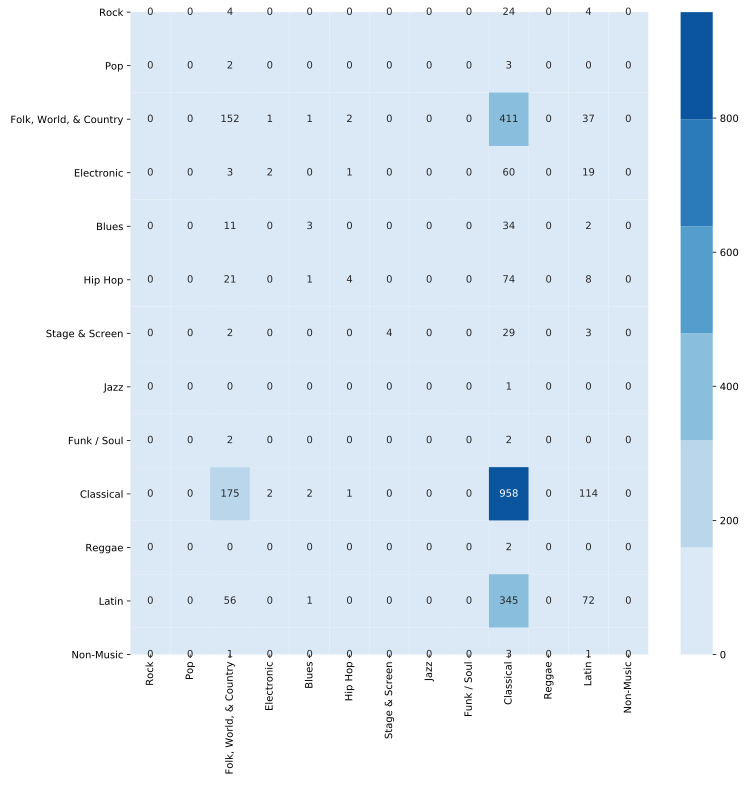

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.00      0.00      0.00        30
                    Pop       0.00      0.00      0.00         4
 Folk, World, & Country       0.35      0.23      0.28       590
             Electronic       0.25      0.02      0.04        89
                  Blues       0.42      0.07      0.12        68
                Hip Hop       0.27      0.04      0.07        98
         Stage & Screen       0.75      0.06      0.12        47
                   Jazz       0.00      0.00      0.00         3
            Funk / Soul       0.00      0.00      0.00         5
              Classical       0.48      0.79      0.60      1206
                 Reggae       0.00      0.00      0.00         3
                  Latin       0.32      0.16      0.21       509
              Non-Music       0.00      0.00      0.00         8

               accuracy                           0.44      2660
              macro avg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre2 als Labels und Stemming als Features <a name="subparagraph5"></a>


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre2"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

13 13


In [39]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 0.5.
Der beste Score ist 0.4561.


In [41]:
classify_svm(C=0.5, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.455.

Der F1-score für die Klassifizierung mit SVM ist 0.446.


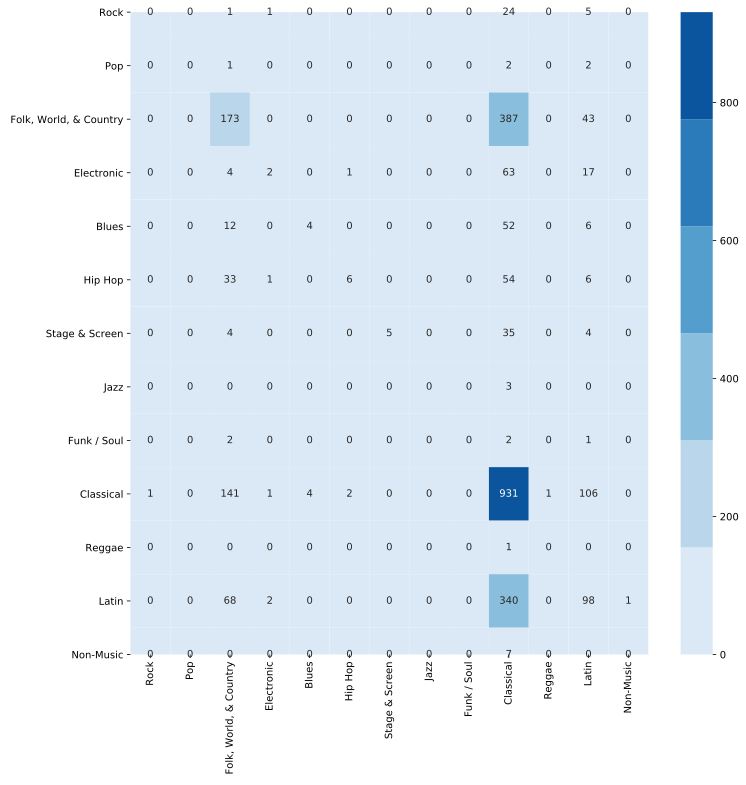

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=0.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre2"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                         precision    recall  f1-score   support

                   Rock       0.00      0.00      0.00        31
                    Pop       0.00      0.00      0.00         5
 Folk, World, & Country       0.39      0.29      0.33       603
             Electronic       0.29      0.02      0.04        87
                  Blues       0.50      0.05      0.10        74
                Hip Hop       0.67      0.06      0.11       100
         Stage & Screen       1.00      0.10      0.19        48
                   Jazz       0.00      0.00      0.00         3
            Funk / Soul       0.00      0.00      0.00         5
              Classical       0.49      0.78      0.60      1187
                 Reggae       0.00      0.00      0.00         1
                  Latin       0.34      0.19      0.25       509
              Non-Music       0.00      0.00      0.00         7

               accuracy                           0.46      2660
              macro avg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM mit allen Liedtexten eines Künstlers und mit Genre1 als Labels und mit Text als Features <a name="paragraph4"></a>


In [2]:
import pandas as pd

In [3]:
corpus = pd.read_csv("../../song_decades_long.csv")

In [4]:
corpus.head(2)

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

8 9


In [27]:
def classify_svm(C=1.0, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 8.5])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 8.5.
Der beste Score ist 0.7012.


In [30]:
classify_svm(C=8.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.598.

Der F1-score für die Klassifizierung mit SVM ist 0.577.


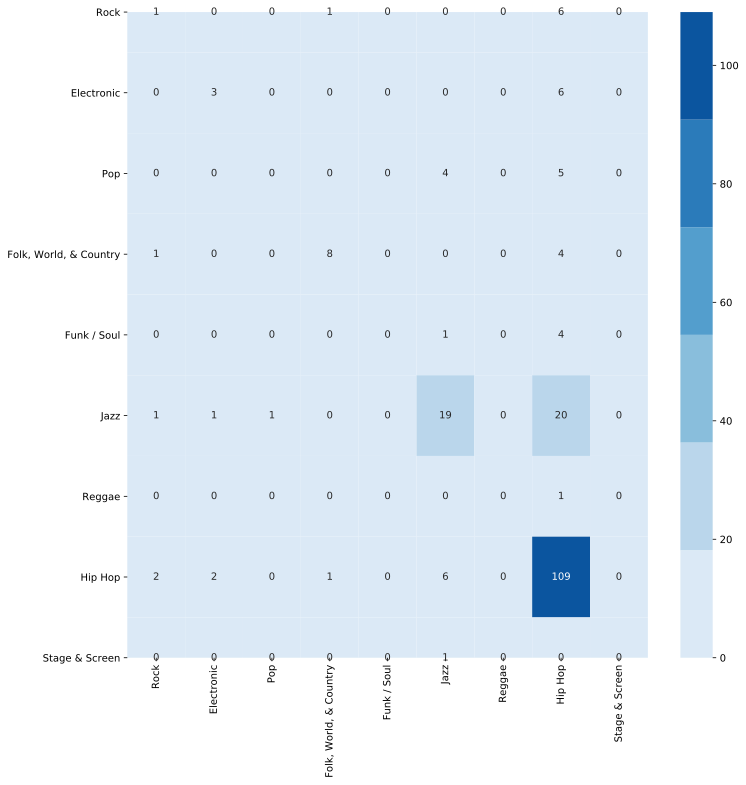

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=8.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                  Rock       0.20      0.12      0.15         8
            Electronic       0.50      0.33      0.40         9
                   Pop       0.00      0.00      0.00         9
Folk, World, & Country       0.80      0.62      0.70        13
           Funk / Soul       0.00      0.00      0.00         5
                  Jazz       0.61      0.45      0.52        42
                Reggae       0.00      0.00      0.00         1
               Hip Hop       0.70      0.91      0.79       120
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.67       208
             macro avg       0.31      0.27      0.28       208
          weighted avg       0.61      0.67      0.63       208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre1 als Labels und mit POS als Features <a name="subparagraph1"></a>

In [210]:
import pandas as pd 
df = pd.read_csv("../../datasets/old_datasets/Spotify/songdata.csv")

In [211]:
df1 = pd.read_csv("../../datasets/currently_dataset/song_decades_long.csv")

In [212]:
df1

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
0,0,"""Weird Al"" Yankovic",1980s,potato skins potato cakes hash browns and i...,potato skin potato cake hash brown and instan...,french plain enough greasy sour lumpy tough en...,Rock,antiviral pop,12745.0,2264.0
1,37,"""Weird Al"" Yankovic",1990s,as i walk through the valley where i harvest m...,as i walk through the valley where i harvest ...,plain perfect fancy amish amish hard amish ami...,Rock,antiviral pop,10803.0,2317.0
2,65,"""Weird Al"" Yankovic",2000s,jillian was her name she was sweeter than asp...,jillian wa her name she wa sweeter than aspar...,same gorgeous perfect close sweet young ripe p...,Rock,antiviral pop,4352.0,1159.0
3,76,"""Weird Al"" Yankovic",2010s,my mama told me when i was hatched act like a...,my mama told me when i wa hatch act like a su...,red hard sure swiss crazy little okay crazy ev...,Rock,antiviral pop,2077.0,705.0
4,81,*NSYNC,1990s,here we go here we go one more time eve...,here we go here we go one more time everybodi...,fine fine free right fine right fine free time...,Electronic,boy band,1786.0,345.0
...,...,...,...,...,...,...,...,...,...,...
1033,13252,Zac Brown Band,2000s,you know i like my chicken fried cold beer on...,you know i like my chicken fri cold beer on a...,cold sweet pecan homemade much southern little...,"Folk, World, & Country",contemporary country,1582.0,399.0
1034,13257,Zac Brown Band,2010s,we never spoke a word but every thought she h...,we never spoke a word but everi thought she h...,foolish wise word thought room face face move ...,"Folk, World, & Country",contemporary country,5467.0,950.0
1035,13277,Zebra,1980s,well you're walking on the moon but there's n...,well you 're walk on the moon but there 's no...,deep real lucky kind about about deep lucky ki...,Rock,album rock,1105.0,225.0
1036,13281,Zero 7,2000s,i lie awake i've gone to ground i'm watching...,i lie awak i 've gone to ground i 'm watch po...,awake enough lonely long bad last old new weak...,Rock,downtempo,1333.0,337.0


In [214]:
import numpy as np
df = df.replace(np.nan, 'nan', regex=True)

In [219]:
df1 = df1[df1.Genre1 != "nan"]

In [221]:
df = df[df.Genre1 != "Non-Music"]

In [192]:
df1 = df1[df1.Genre1 != "Stage & Screen"]

In [224]:
len(list(df1.Genre1.unique()))

9

In [141]:
df

,Unnamed: 0,Unnamed: 0.1,artist,song,link,text,Genre1,Genre2,genre1,genre2
20401,20401,20401,Utopia,Just One Victory,/u/utopia/just+one+victory_10162404.html,We've been waiting so long \nWe've been waiti...,Rock,Electronic,art rock,beatlesque
46783,46783,46783,Olivia Newton-John,The Best Of Me,/o/olivia+newton+john/the+best+of+me_20103341....,So many years gone \nStill I remember \nHow ...,Pop,Rock,adult standards,australian dance
33984,33984,33984,Gino Vannelli,Seek And You Will Find,/g/gino+vannelli/seek+and+you+will+find_204997...,You been laying it on the line \nToo much fat...,Pop,Rock,adult standards,classic canadian rock
22478,22478,22478,Zero 7,Passing By,/z/zero+7/passing+by_10198565.html,Don't think you love me \nConfusion settling ...,Rock,Electronic,downtempo,electronica
10318,10318,10318,Kenny Chesney,Life Is Good,/k/kenny+chesney/life+is+good_20077648.html,Darlin' if you think back \nTo the heartbroke...,"Folk, World, & Country",Rock,contemporary country,country
...,...,...,...,...,...,...,...,...,...,...
25104,25104,25104,Bette Midler,Buckets Of Rain,/b/bette+midler/buckets+of+rain_10031080.html,"Ohh oh, ohh oh, ah \nSing to me baby, baby \...",Pop,Rock,adult standards,mellow gold
53963,53963,53963,The Tragically Hip,We Want To Be It,/t/tragically+hip/we+want+to+be+it_21047944.html,"Drip, drip, drip \nBaby, when'd you get so Ze...",Rock,Pop,canadian indie,canadian rock
41655,41655,41655,Lil Wayne,Hit U Up (w Hot Boys),/l/lil+wayne/hit+u+up+w+hot+boys_20948684.html,"[Turk] \nCome on, come on \nCome on, come on...",Hip Hop,Electronic,hip hop,new orleans rap
214,214,214,Aerosmith,Take It Easy,/a/aerosmith/take+it+easy_20004502.html,Everybody talkin' 'bout what it is and what it...,Rock,Pop,album rock,classic rock


In [232]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(df["Genre1"])
vector  = TfidfVectorizer().fit_transform(df["text"])

labels1 = LabelEncoder().fit_transform(df1["Genre1"])
vector1  = TfidfVectorizer().fit_transform(df1["text"])


X_train = vector
y_train = labels
#X_test = vector1
y_test = labels1

#X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    #labels, 
                                                    #test_size=0.2, 
                                                    #train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

9 9


In [233]:
X_train.shape

(57276, 81821)

In [237]:
vector1.resize(1038, 81821)

In [238]:
X_test = vector1

In [239]:
X_test

<1038x81821 sparse matrix of type '<class 'numpy.float64'>'
	with 726508 stored elements in Compressed Sparse Row format>

In [240]:
def classify_svm(C, cv):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [241]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([2.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 2.0.
Der beste Score ist 0.6013.


In [242]:
classify_svm(C=2.0, cv=3)

Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.589.

Der F1-score für die Klassifizierung mit SVM ist 0.598.


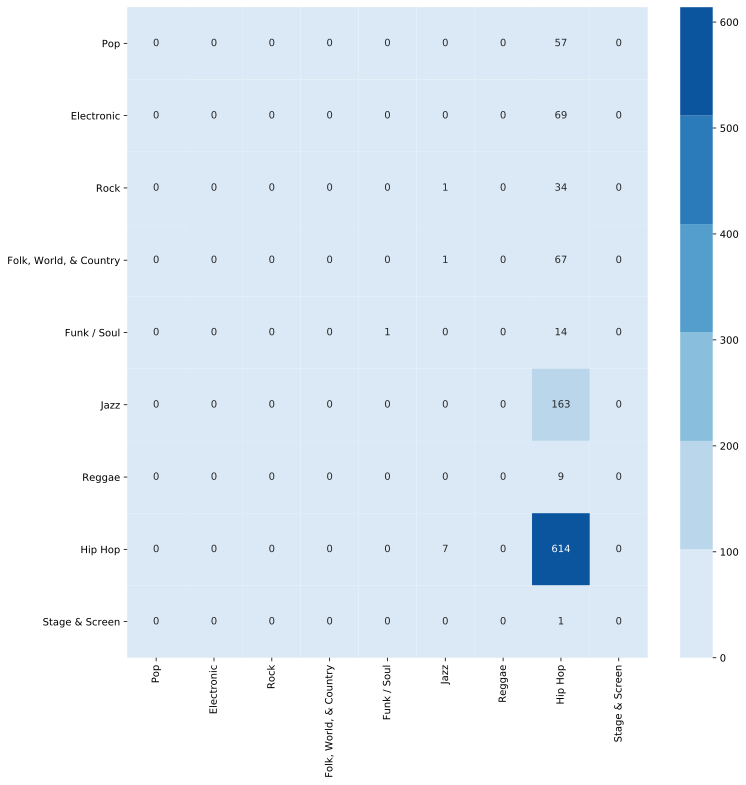

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=2.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = df["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.savefig('SVM_all_data.png', bbox_inches = "tight")

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                   Pop       0.00      0.00      0.00        57
            Electronic       0.00      0.00      0.00        69
                  Rock       0.00      0.00      0.00        35
Folk, World, & Country       0.00      0.00      0.00        68
           Funk / Soul       1.00      0.07      0.12        15
                  Jazz       0.00      0.00      0.00       163
                Reggae       0.00      0.00      0.00         9
               Hip Hop       0.60      0.99      0.74       621
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.59      1038
             macro avg       0.18      0.12      0.10      1038
          weighted avg       0.37      0.59      0.45      1038



C:\Users\jonas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Mit Genre1 als Labels und mit Stemming als Features <a name="subparagraph2"></a>

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

8 9


In [16]:
def classify_svm(C=0.5, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 6.0.
Der beste Score ist 0.7096.


In [19]:
classify_svm(C=6.0, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.598.

Der F1-score für die Klassifizierung mit SVM ist 0.577.


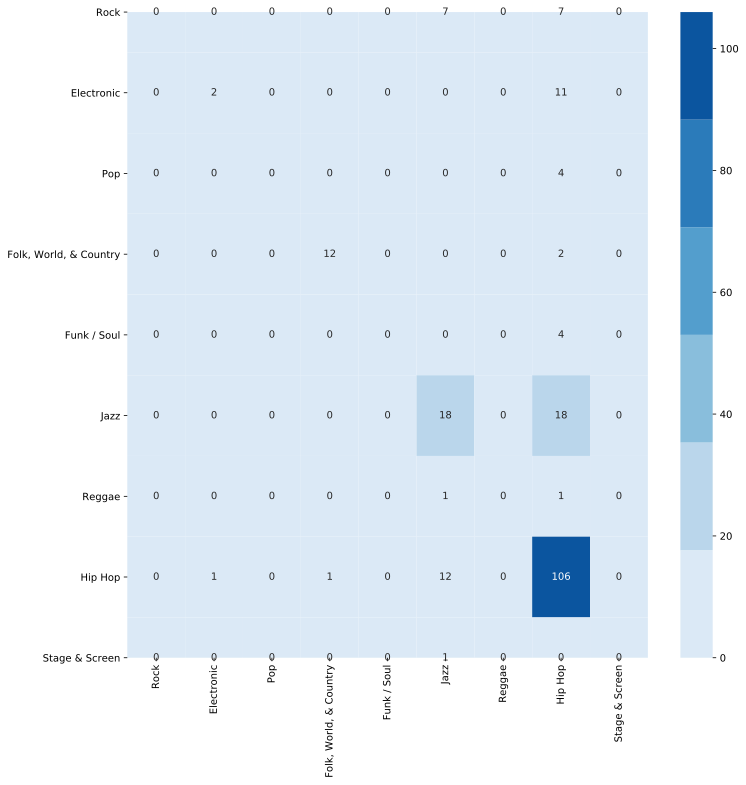

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=6.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                  Rock       0.00      0.00      0.00        14
            Electronic       0.67      0.15      0.25        13
                   Pop       0.00      0.00      0.00         4
Folk, World, & Country       0.92      0.86      0.89        14
           Funk / Soul       0.00      0.00      0.00         4
                  Jazz       0.46      0.50      0.48        36
                Reggae       0.00      0.00      0.00         2
               Hip Hop       0.69      0.88      0.78       120
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.66       208
             macro avg       0.30      0.27      0.27       208
          weighted avg       0.58      0.66      0.61       208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM mit Features anreichern, mit Genre1 als Labels und mit Text und POS als Features <a name="paragraph5"></a>

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["text"], corpus["POS"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

8 9


In [58]:
def classify_svm(C=0.5, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 6.0.
Der beste Score ist 0.6976.


In [60]:
classify_svm(C=6.0, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.598.

Der F1-score für die Klassifizierung mit SVM ist 0.615.


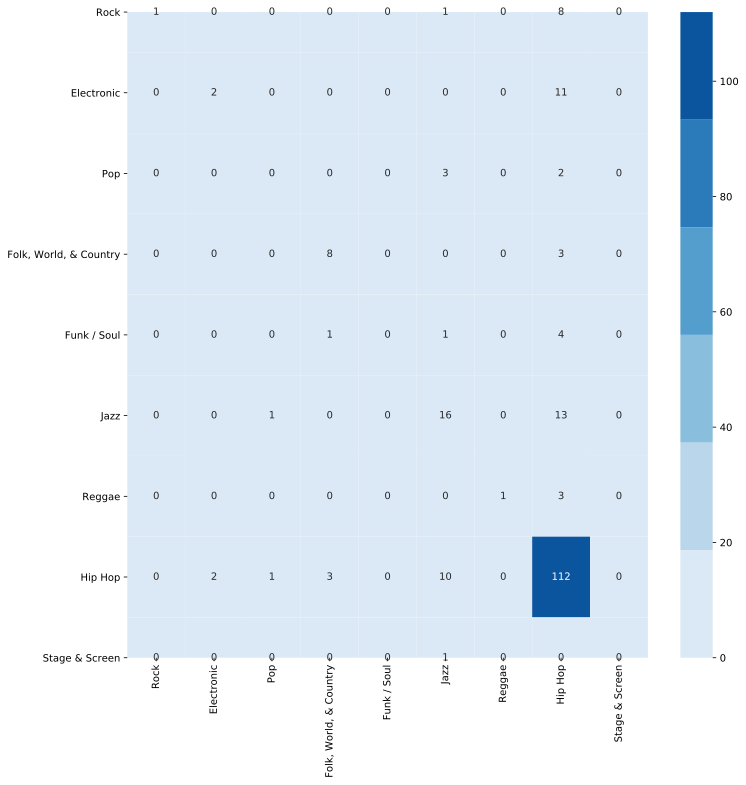

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=6.5)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                  Rock       1.00      0.10      0.18        10
            Electronic       0.50      0.15      0.24        13
                   Pop       0.00      0.00      0.00         5
Folk, World, & Country       0.67      0.73      0.70        11
           Funk / Soul       0.00      0.00      0.00         6
                  Jazz       0.50      0.53      0.52        30
                Reggae       1.00      0.25      0.40         4
               Hip Hop       0.72      0.88      0.79       128
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.67       208
             macro avg       0.49      0.29      0.31       208
          weighted avg       0.65      0.67      0.63       208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre1 als Labels und mit Text und Stemming als Features <a name="subparagraph1"></a> 

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["text"], corpus["stemmed_text"])


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

8 9


In [65]:
def classify_svm(C=0.5, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [67]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 7.5])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 7.5.
Der beste Score ist 0.688.


In [68]:
classify_svm(C=7.5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.598.

Der F1-score für die Klassifizierung mit SVM ist 0.601.


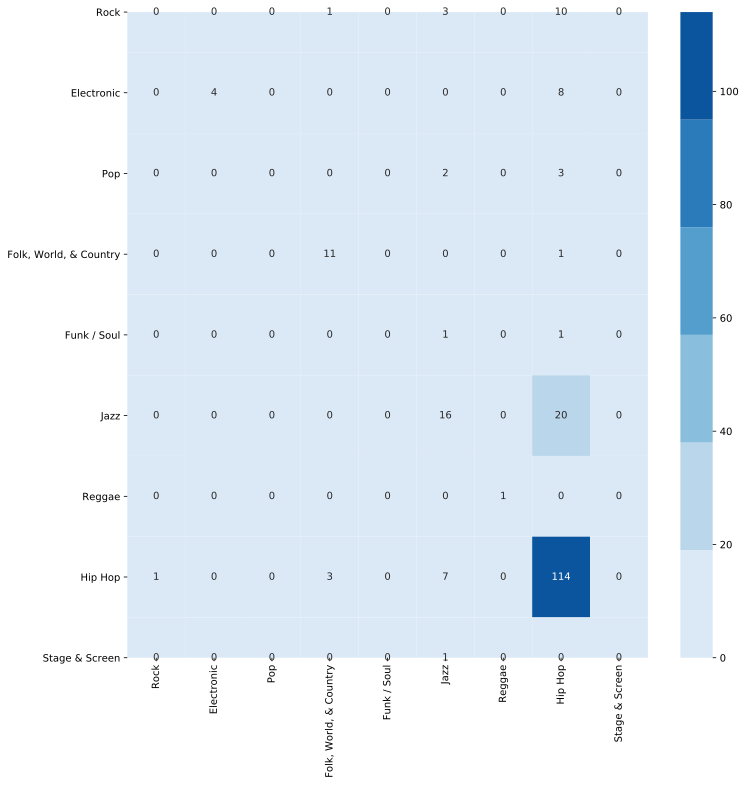

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=4.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                  Rock       0.00      0.00      0.00        14
            Electronic       1.00      0.33      0.50        12
                   Pop       0.00      0.00      0.00         5
Folk, World, & Country       0.73      0.92      0.81        12
           Funk / Soul       0.00      0.00      0.00         2
                  Jazz       0.53      0.44      0.48        36
                Reggae       1.00      1.00      1.00         1
               Hip Hop       0.73      0.91      0.81       125
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.70       208
             macro avg       0.44      0.40      0.40       208
          weighted avg       0.63      0.70      0.65       208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Mit Genre1 als Labels und mit POS und Stemming als Features <a name="subparagraph2"></a>

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

labels = LabelEncoder().fit_transform(corpus["Genre1"])
vector  = TfidfVectorizer().fit_transform(corpus["POS"], corpus["stemmed_text"])



X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,)
print(len(np.unique(y_train)), len(np.unique(y_test)))

8 9


In [81]:
def classify_svm(C=0.5, cv=3):   
    # SVM
    svm_classifier = SVC(gamma='auto')
    svm = svm_classifier.fit(X_train, y_train)

    # cross validation des Trainingsdatensatzes
    svm_scores = cross_val_score(svm_classifier, vector, labels, cv=cv)
    svm_mean = np.mean(svm_scores)

    print("Der Mittelwert der cross validation bei der Klassifizierung " 
          + f" mit SVM ist {str(np.around(svm_mean, decimals=3))}."
          + "\n")


    # F1-score des Testdatensatzes
    y_pred = svm_classifier.predict(X_test)
    svm_f1 = f1_score(y_test, y_pred, average="micro")

    print("Der F1-score für die Klassifizierung mit SVM ist "
          + f"{str(np.around(svm_f1, decimals=3))}.")
# classify_svm()

In [84]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])}

grid = GridSearchCV(LinearSVC(), parameters, cv=3, scoring="f1_micro")
grid.fit(X_train, y_train)

# Ergebnisse
print(f"Der beste Hyperparameter für C ist {str(grid.best_estimator_.C)}.")
print(f"Der beste Score ist {str(np.around(grid.best_score_, decimals=4))}.")

Der beste Hyperparameter für C ist 2.0.
Der beste Score ist 0.6687.


In [85]:
classify_svm(C=2.0, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Der Mittelwert der cross validation bei der Klassifizierung  mit SVM ist 0.598.

Der F1-score für die Klassifizierung mit SVM ist 0.606.


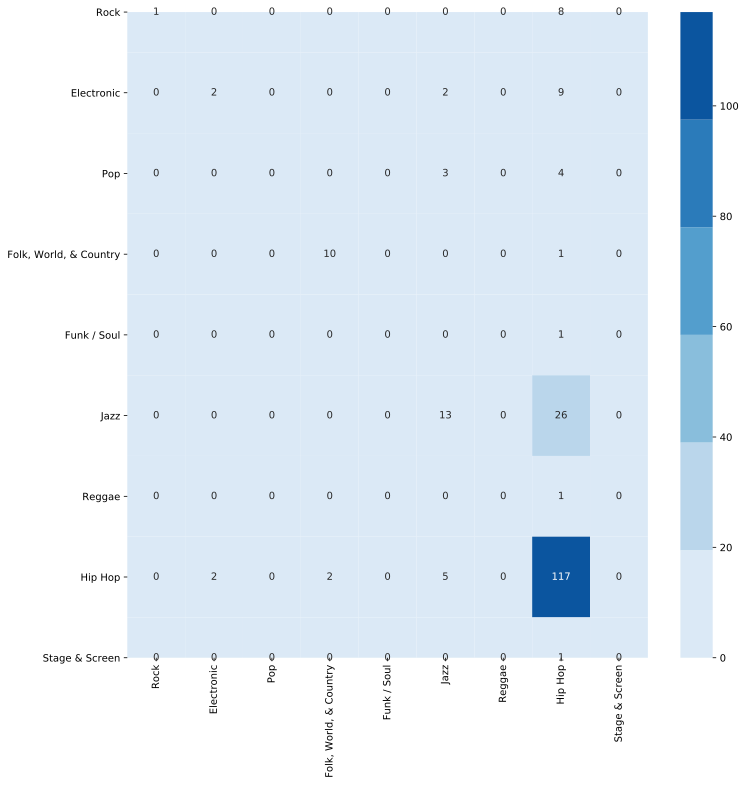

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

svm_classifier = LinearSVC(C=2.0)
svm = svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# Die Original Kategorienbezeichnungen
classes = corpus["Genre1"].drop_duplicates().tolist()

# Ein DataFrame mit den Kategorienbezeichnungen als Reihen und Spalten
cnf_df = pd.DataFrame(cnf_matrix, index=classes, columns=classes)
    
plt.figure(figsize=(11,11))
sns.heatmap(cnf_df, annot=True, fmt='d',cmap=sns.color_palette("Blues"))
plt.tight_layout()
plt.show()

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))

                        precision    recall  f1-score   support

                  Rock       1.00      0.11      0.20         9
            Electronic       0.50      0.15      0.24        13
                   Pop       0.00      0.00      0.00         7
Folk, World, & Country       0.83      0.91      0.87        11
           Funk / Soul       0.00      0.00      0.00         1
                  Jazz       0.57      0.33      0.42        39
                Reggae       0.00      0.00      0.00         1
               Hip Hop       0.70      0.93      0.80       126
        Stage & Screen       0.00      0.00      0.00         1

              accuracy                           0.69       208
             macro avg       0.40      0.27      0.28       208
          weighted avg       0.65      0.69      0.63       208



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
